In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize


In [70]:
# Load in your data
data = pd.read_csv('/Users/sriskandhakandimalla/Documents/PSYCH119/LumositySample_user30222.csv')
g = data.gameplay
obsy = data.score
s = data.session
d = data.dayselapsed

In [71]:
# Remove rows with missing 'score' values
cleaned_data_user_30222 = data.dropna(subset=['score'])
cleaned_data_user_30222.head()

,gameplay,score,session,gameplay_withinsession,timestamp,dayselapsed
0,1,35.0,1,1,22-Sep-2015 22:02:00,0.000000
1,2,43.0,1,2,22-Sep-2015 22:03:12,0.000833
3,4,38.0,2,1,27-Sep-2015 14:38:56,4.692315
4,5,46.0,2,2,27-Sep-2015 14:40:08,4.693148
5,6,47.0,3,1,01-Oct-2015 18:56:04,8.870880


In [72]:
def AFDMODEL(u, b, h, c, s, d, g):
    n = len(g)  # Number of practice events
    y = np.zeros(n)

    for i in range(n):  # Loop over all n practice events
        strength = 0  # Initialize strength to zero
        for j in range(i):  # Loop over all practice events before the i-th
            if s[i] == s[j]: 
                t = (i - j)  # Within a session, elapsed time is based on number of practice events elapsed
            else:
                t = (i - j) + (d[i] - d[j]) * h  # Between sessions, add an additional factor based on number of days elapsed
            strength += np.exp(-c*t)  # Increment the total strength

        y[i] = u + b * np.log(strength + 1)  # Map the total strength to a predicted score for the i-th practice event

    return y

In [73]:
def calcmse(params, s, d, g, obsy):
    # Parameters
    u = params[0]  # assume that the 1st parameter is u
    b = params[1]  # assume that the 2nd parameter is b
    h = params[2]  # assume that the 3rd parameter is h
    c = params[3]  # assume that the 4th parameter is c


    # Predicted scores
    predy = AFDMODEL(u, b, h, c, s, d, g)  # predicted scores

    # Mean squared deviations between predicted and observed score
    #   This is what we want to minimize
    mse = np.mean((predy - obsy)**2)

    return mse

In [74]:
# Initialize parameters for the optimization procedure
p0 = np.zeros(4)
p0[0] = 30  #u
p0[1] = 1 #b
p0[2] = 10 #h
p0[3] = 0.2 #c

In [79]:
# Extract gameplay and score values for fitting
g = cleaned_data_user_30222['gameplay'].values
s = cleaned_data_user_30222['session'].values
d = cleaned_data_user_30222['dayselapsed'].values
obsy = cleaned_data_user_30222['score'].values


In [81]:
#Run the optimizer and get the parameters p that minimize the squared deviations
result = minimize(calcmse, p0, args=(s, d, g, obsy))
p = result.x



/var/folders/lw/z_mh2kd50pqc8qswk8b692sh0000gn/T/ipykernel_21575/765629352.py:12: RuntimeWarning: overflow encountered in exp
  strength += np.exp(-c*t)  # Increment the total strength
/Users/sriskandhakandimalla/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/lw/z_mh2kd50pqc8qswk8b692sh0000gn/T/ipykernel_21575/765629352.py:12: RuntimeWarning: overflow encountered in exp
  strength += np.exp(-c*t)  # Increment the total strength


In [82]:
#Report the parameters found
print('Best fitting parameters:')
print('u={0:3.3f}'.format(p[0]))
print('b={0:3.3f}'.format(p[1]))
print('h={0:3.3f}'.format(p[2]))
print('c={0:3.3f}'.format(p[3]))

u = p[0]
b = p[1]
h = p[2]
c = p[3]

Best fitting parameters:
u=30.262
b=1.187
h=10.000
c=-0.032


In [83]:
#Calculate the predicted y using the best fitting parameters
predy = AFDMODEL(u, b, h, c, s, d, g)

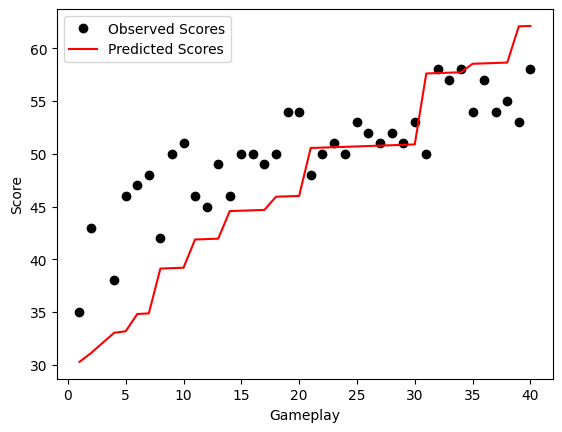

In [84]:
# Plotting the observed and predicted scores
plt.plot(g, obsy, 'ko', label='Observed Scores')
plt.plot(g, predy, 'r-', label='Predicted Scores')
plt.xlabel('Gameplay')
plt.ylabel('Score')
plt.legend()
plt.show()